In [1]:
import glob
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from google.colab import drive
import random

%matplotlib inline

Cargamos los datos.

In [2]:
drive.mount('/content/drive')
#Los datos corresponden a un subset del dataset cats vs dogs de https://www.kaggle.com/c/dogs-vs-cats
files=glob.glob('/content/drive/MyDrive/Data/CATS_DOGS/*')

Mounted at /content/drive


In [3]:
len(files)

1787

In [4]:
#numero de pixeles para nuestras imágenes.
num_px=64

Preparamos el entrenamiento supervisado.

In [5]:
files1 = random.sample(files, len(files))  #Para seleccionar datos random del dataset

In [6]:
#Entrenamiento supervisado
train_x=[]
train_y=[]
for file in files1[:600]:  #Entrenamos con las primeras 600 imágenes
    img=Image.open(file)
    img=img.resize((num_px,num_px))  #Redefinimos la resolución de las imágenes
    data=np.asarray(img)  #Guardamos cada imágen en un vector
    train_x.append(data)  #Concatenamos los vectores en uno solo
    img.close()
    if 'dog' in file:
        train_y.append(1)  # 1 si es un perro
    if 'cat' in file:
        train_y.append(0)  # 0 si es un gato
train_y=np.asarray(train_y)
train_x=np.asarray(train_x)

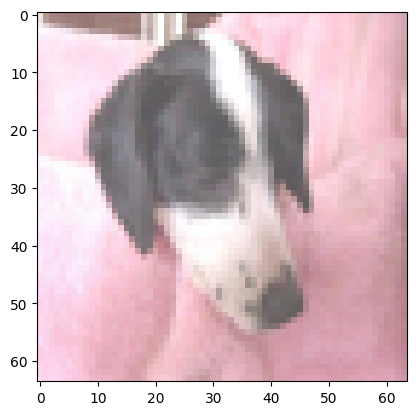

In [7]:
plt.imshow(train_x[0])

Preparamos el dataset de prueba.

In [8]:
test_x=[]
test_y=[]
for file in files1[600:]:  #Hacemos la prueba a partir del dato número 600 porque entrenamos con los primeros 600
    #print(file)
    img=Image.open(file)
    img=img.resize((num_px,num_px))
    data=np.asarray(img)
    test_x.append(data)
    img.close()
    if 'dog' in file:
        test_y.append(1)
    if 'cat' in file:
        test_y.append(0)
test_y=np.asarray(test_y)
test_x=np.asarray(test_x)

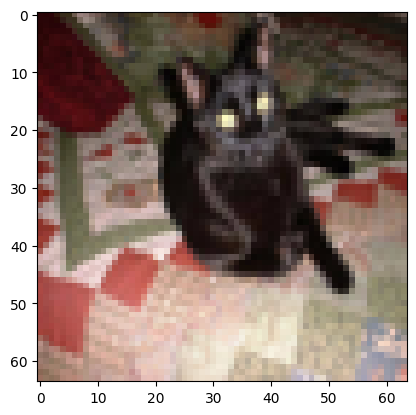

In [9]:
plt.imshow(test_x[0])

Hacemos una transformación de los arreglos que contienen las imagenes para que sean arreglos de una dimensión.

In [10]:
train_x_flatten = train_x.reshape(train_x.shape[0], -1).T

test_x_flatten = test_x.reshape(test_x.shape[0], -1).T

train_set_y=train_y.reshape((1,train_y.shape[0]))
test_set_y=test_y.reshape((1,test_y.shape[0]))

Normalizamos las imágenes.

In [11]:
train_set_x= train_x_flatten/255
test_set_x= test_x_flatten/255

Ya esta listo nuestro set de datos para poder trabajar con el.

Debemos añadir una capa oculta de dos neuronas, cuya salida pasa a la capa con una sola neurona que genera una predicción final.
Este proceso se conoce como **forward propagation**.

Ahora, para simular las capas de una Neurona, creamos varias funciones tomando como base el código del perceptrón.

In [12]:
#Definimos las funciones

#Para la función Z
def z(x,w,b):
  Z = w.T @ x + b
  return Z

#Para el sigmoide
def sigmoide(x,w,b):
  a = 1 / (1 + np.exp(-z(x,w,b)))
  return a

#Para el costo
def costo (x,w,b,y):
  a = sigmoide(x,w,b)
  m = y.shape[1]
  cost = -1 / m * np.sum(y * np.log(a) + (1 - y) * np.log(1 - a))
  return cost

#Para la propagación descendente y calcular los gradientes
def dw(x,y,w,b):
  a = sigmoide(x,w,b)
  m = x.shape[1]
  dz = a - y
  dw = np.dot(x, dz.T) / m
  return dw
def db(x,y,w,b):
  a = sigmoide(x,w,b)
  m = x.shape[1]
  dz = a - y
  db = np.sum(dz) / m
  return db

#Para el método gradiente descendiente
def grad_des(x,y,w,b,iter=1000,taza=0.001):
  costs = []
  for i in range (iter):
    cost = costo(x,w,b,y)
    costs.append(cost)
    #Valores actualizados de los pesos
    w -= taza*dw(x,y,w,b)
    b -= taza*db(x,y,w,b)
  return w, b, costs

In [15]:
#Definimos la función para agregar las capas
def neurona_forward(x,c,neuronas,iter=1000,taza=0.001):  #c es la cantidad de capas
  a = x
  for c in range(c):
    an = []
    for n in range(neuronas[c]):
      w = 0.1 * np.random.random(size=a.shape)
      b = 0.1 * np.random.random(size=a.shape)
      an.append(np.sum(w * a + b))
      print(f'Neurona{c,n+1},    Activación:{np.sum(a)},    w:{np.sum(w)},   b:{np.sum(b)}')
    a = np.array(an)
  return w,b

In [18]:
#Establecemos los parámetros iniciales
#w, b inician en ceros
w=np.zeros(train_set_x.shape)
b=np.zeros(train_set_y.shape[1])
taza= 0.01
np.random.seed(1235)
c=2         #Éste es el valor l-1
neuronas=[2,1]

In [20]:
w,b = neurona_forward(train_set_x,c,neuronas,iter=100,taza=0.0001)

Neurona(0, 1),    Activación:3410958.882352936,    w:368693.4753183766,   b:368555.50680953305
Neurona(0, 2),    Activación:3410958.882352936,    w:368646.75496805663,   b:368523.6560147521
Neurona(1, 1),    Activación:1078183.7506347732,    w:0.03182820879729058,   b:0.07283932627229261
